In [1]:
#!pip install keras
#!pip install scikit-image
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import time
from PIL import Image
np.random.seed(1000)

Using TensorFlow backend.


In [2]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = cifar10.load_data()
print(x_train_orig.shape, y_train_orig.shape, x_test_orig.shape, y_test_orig.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
def convert_to_imagenet_size(images):
    temp_img = []
    for i in range(len(images)):
        img = images[i]
        img = Image.fromarray(img)
        img = np.array(img.resize((227,227),Image.BICUBIC))
        temp_img.append(img)
    return np.array(temp_img)

In [4]:
x_train = convert_to_imagenet_size(x_train_orig)
x_test = convert_to_imagenet_size(x_test_orig)

(50000, 227, 227, 3) (10000, 227, 227, 3)
y =  [9]


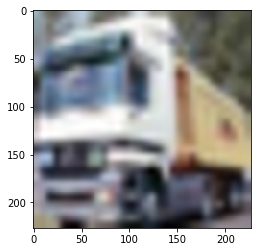

In [5]:
print(x_train.shape, x_test.shape)
i = 1
plt.imshow(x_train[i])
print('y = ', y_train_orig[i])

In [7]:
def preprocess(x):
    for i in range(len(x)):
        x[i] = x[i].astype('float32')
        x[i] = x[i] / 255
    return x

In [8]:
x_train = preprocess(x_train)
x_test = preprocess(x_test)
y_train = to_categorical(y_train_orig, 10)
y_test = to_categorical(y_test_orig, 10)

In [9]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 227, 227, 3) (50000, 10) (10000, 227, 227, 3) (10000, 10)


In [10]:
alexnet = Sequential() 
alexnet.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), activation='relu', kernel_initializer='he_normal'))
alexnet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
alexnet.add(BatchNormalization())
alexnet.add(Conv2D(filters=256, kernel_size=(5,5), activation='relu', padding = 'same', kernel_initializer='he_normal'))
alexnet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
alexnet.add(BatchNormalization())
alexnet.add(Conv2D(filters=384, kernel_size=(3,3), activation='relu', padding = 'same', kernel_initializer='he_normal'))
alexnet.add(BatchNormalization())
alexnet.add(Conv2D(filters=384, kernel_size=(3,3), activation='relu', padding = 'same', kernel_initializer='he_normal'))
alexnet.add(BatchNormalization())
alexnet.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding = 'same', kernel_initializer='he_normal'))
alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
alexnet.add(BatchNormalization())
alexnet.add(Flatten())
alexnet.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
alexnet.add(Dropout(0.4))
alexnet.add(BatchNormalization())
alexnet.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
alexnet.add(Dropout(0.4))
alexnet.add(BatchNormalization())
alexnet.add(Dense(10, activation='relu', kernel_initializer='he_normal'))

In [11]:
alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)      

In [12]:
alexnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
alexnet.fit(x_train, y_train, batch_size = 32, epochs = 20, shuffle = True)

Epoch 1/20
50000/50000 [==============================] - 127s 3ms/step - loss: 2.2379 - accuracy: 0.1595
Epoch 2/20
50000/50000 [==============================] - 126s 3ms/step - loss: 2.2209 - accuracy: 0.1714
Epoch 3/20
50000/50000 [==============================] - 124s 2ms/step - loss: 2.2129 - accuracy: 0.1778
Epoch 4/20
50000/50000 [==============================] - 124s 2ms/step - loss: 2.2182 - accuracy: 0.1714
Epoch 5/20
50000/50000 [==============================] - 124s 2ms/step - loss: 2.2168 - accuracy: 0.1695
Epoch 6/20
50000/50000 [==============================] - 124s 2ms/step - loss: 2.2064 - accuracy: 0.1768
Epoch 7/20
50000/50000 [==============================] - 124s 2ms/step - loss: 2.2039 - accuracy: 0.1794
Epoch 8/20
50000/50000 [==============================] - 124s 2ms/step - loss: 2.2045 - accuracy: 0.1806
Epoch 9/20
50000/50000 [==============================] - 124s 2ms/step - loss: 2.2063 - accuracy: 0.1807
Epoch 10/20
50000/50000 [=====================

In [15]:
scores = alexnet.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 8s 759us/step
Test loss: 8.287676982879638
Test accuracy: 0.11429999768733978
